# in class exercises for 10.17.2018 (FFT + practice plotting + boolean indexing)

[npy file format](https://www.numpy.org/devdocs/reference/generated/numpy.lib.format.html)

[npz file format (save several arrays)](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.savez.html)

[article about advantages of npy/npz format compared to csv and other common formats](https://towardsdatascience.com/why-you-should-start-using-npy-file-more-often-df2a13cc0161)



## First import data from eeg_data00.npz

In [1]:
# start by importing the modules that you'll need. 
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## load eeg_data00.npz...
* you should find that it has three arrays: data, tx, and sr (with 'data' a #trials x # timepoints array containing the EEG data, the time of each data acquisition in tx, and the sample rate stored as sr).  

In [30]:
# load the data...
eeg = np.load('eeg_data00.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...which will tell us that there 960 trials and 876 timepoints per trial sampled
# at 250Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']
# now you can just write data instead of eeg['data'] (and can for tx and sr as well...)
print(data)
print(sr)

Shape of the big eeg data set:  (960, 876)
Sample rate:  250
[[-13.78035536 -18.35172324 -14.38398204 ...  16.27583638  15.95193914
    3.71009567]
 [ 17.2401668   10.90208669   9.83469806 ...  16.69543053  17.76281917
    6.90490028]
 [ 31.00579956  21.37721793  24.49840953 ...  61.47422415  74.02524225
   75.14415999]
 ...
 [ -4.99832334   6.83128727   8.77467072 ...  -4.90262643  -8.76730942
  -15.37775766]
 [ 28.77532537  18.24866503  22.31946445 ...   2.98132688  11.33640345
   20.53066832]
 [  9.66538813  14.56065326  -0.19875513 ...  12.5068503    7.31713313
   13.94966528]]
250


## First - plot the data! (always do this first). 
* Compute the mean across all trials and then plot with tx on the xaxis. 
* Remember - good form is to specify the axis that you want to average over when using np.mean!

overall mean =  -3.0795048968313727


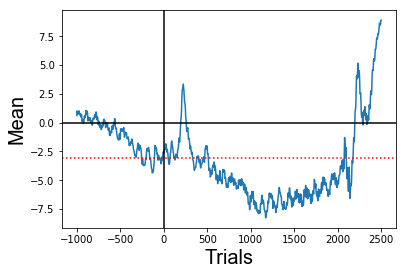

In [35]:
# the data file contains lots of time series, different trials of the experiment
print('overall mean = ', np.mean(data))
# using axis=0 tells the function to compute the mean for each trial
mean = np.mean(data, axis=0)
plt.plot(tx,mean)
plt.xlabel('Trials', **fig_font)
plt.ylabel('Mean', **fig_font)
plt.axhline(np.mean(data),color='r',linestyle=':')
plt.axvline(0, color = 'k')
plt.axhline(0, color = 'k')
plt.show()


## Now grab the data from time 0 until time 2000 and FFT it! 
* hint: you can use boolean indexing by selecting the columns from the 'data' matrix that meet: (tx>=0)  & (tx<2000)
* while you're at it, go ahead and grab the timepoints corresponding to that interval as well so that you have an array for the x-axis of any plots

(960, 500)
[   0    4    8   12   16   20   24   28   32   36   40   44   48   52
   56   60   64   68   72   76   80   84   88   92   96  100  104  108
  112  116  120  124  128  132  136  140  144  148  152  156  160  164
  168  172  176  180  184  188  192  196  200  204  208  212  216  220
  224  228  232  236  240  244  248  252  256  260  264  268  272  276
  280  284  288  292  296  300  304  308  312  316  320  324  328  332
  336  340  344  348  352  356  360  364  368  372  376  380  384  388
  392  396  400  404  408  412  416  420  424  428  432  436  440  444
  448  452  456  460  464  468  472  476  480  484  488  492  496  500
  504  508  512  516  520  524  528  532  536  540  544  548  552  556
  560  564  568  572  576  580  584  588  592  596  600  604  608  612
  616  620  624  628  632  636  640  644  648  652  656  660  664  668
  672  676  680  684  688  692  696  700  704  708  712  716  720  724
  728  732  736  740  744  748  752  756  760  764  768  772  776 

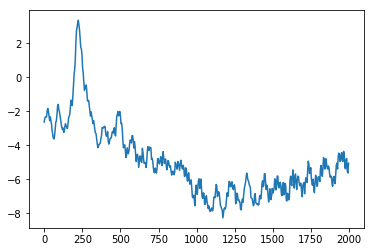

In [27]:
set = data[:,(tx>=0) & (tx<2000)]
print(set.shape)
tax = tx[(tx>=0) & (tx<2000)]
print(tax)
plt.plot(tax,np.mean(set,axis=0))

## Do the FFT on the data averaged across trials (so first avg, then FFT)

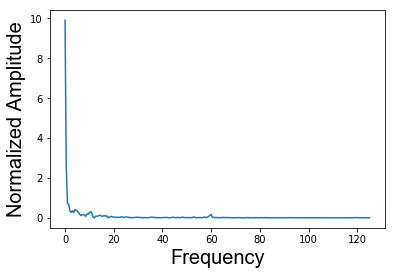

In [39]:
aved = np.mean(set, axis=0)

sp = np.fft.rfft(aved)
amp = (np.abs(sp)  / len(aved) ) * 2
dt = 1/sr
freq = np.fft.rfftfreq(aved.size, dt)

plt.plot(freq, amp)
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Normalized Amplitude', **fig_font)
plt.show()

## Now lets look at a few frequency segments to see what is going on
* First plot just the frequencies in between 55 and 65Hz (use boolean indexing)
* Then look at the frequencies in between 5 and 20Hz

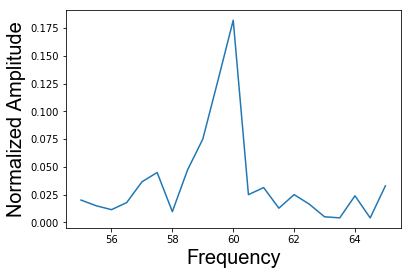

In [44]:
sub = (freq>=55) & (freq<=65)
plt.plot(freq[sub], amp[sub])
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Normalized Amplitude', **fig_font)
plt.show()

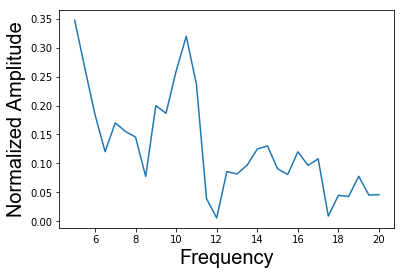

In [45]:
sub = (freq>=5) & (freq<=20)
plt.plot(freq[sub], amp[sub])
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Normalized Amplitude', **fig_font)
plt.show()

## Remember what the above plots look like, and then do something that *seems* just a little different
* FFT each trial 
* Then compute the amplitude on each trial
* Then compute the average amplitude across all trials
* Then plot like you did above - first over all frequs, then zoom in and plot the 55-65hz window and the 5-20Hz window 
* To make this work, note that np.fft.rfft can operate on the entire data matrix at once. You should ALWAYS specify the axis that you want the FFT to work over (in this case the time axis, or axis 1). np.fft.rfft will default to the LAST axis if you specify nothing, which in this case is ok but it would totally NOT be ok if your data were transposed
* hint: handy to store the shape of the data matrix before you do all this so that you can pass in the number of timepoints to the amplitude normalization function and the freq-axis function. e.g. r,c = data.shape

[np.fft.rfft documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.fft.rfft.html)

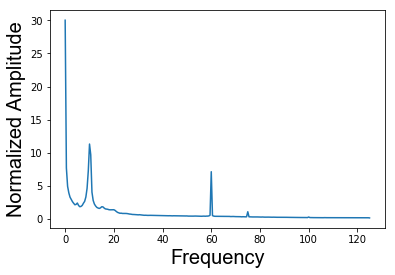

In [61]:
n = set.shape[1]
sp = np.fft.rfft(set, axis=1)
amp = (np.abs(sp)  / n ) * 2
aveamp = np.mean(amp, axis=0)

dt = 1/sr
freq = np.fft.rfftfreq(n, dt)

plt.plot(freq, aveamp)
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Normalized Amplitude', **fig_font)
plt.show()

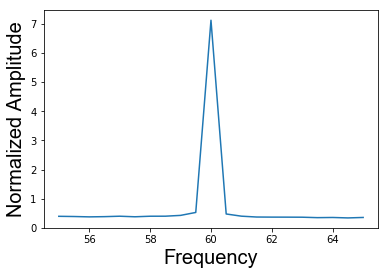

In [62]:
sub = (freq>=55) & (freq<=65)
plt.plot(freq[sub], aveamp[sub])
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Normalized Amplitude', **fig_font)
plt.show()

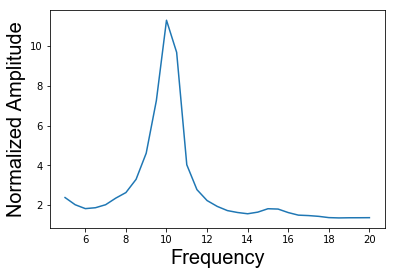

In [63]:
sub = (freq>=5) & (freq<=20)
plt.plot(freq[sub], aveamp[sub])
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Normalized Amplitude', **fig_font)
plt.show()

## Now compare the plots you got just now (FFT each trial, then compute amp, then average) with the plots you got when you averaged in time domain first and THEN did the FFT. Why are they different?
* hint: think about phase...

## Switch to a new data set...load eeg_data01.npz. To make it easy I renamed all the variables in this data set to match the var names in the last data set (data, sr, tx)

In [64]:
# load the data...
eeg = np.load('eeg_data01.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...which will tell us that there 1600 trials and 4102 timepoints per trial sampled
# at 1024Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']

Shape of the big eeg data set:  (1600, 4102)
Sample rate:  1024


## Plot the data, just like we did above

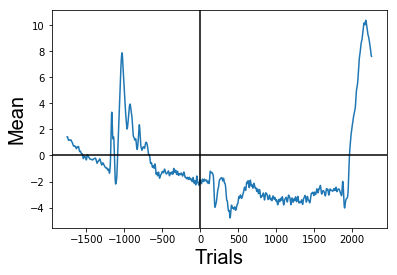

In [65]:
mean = np.mean(data, axis=0)
plt.plot(tx,mean)
plt.xlabel('Trials', **fig_font)
plt.ylabel('Mean', **fig_font)
plt.axvline(0, color = 'k')
plt.axhline(0, color = 'k')
plt.show()

## Now segment the data from time 0 to time 1753 and plot to make sure it looks right

(1600, 1796)
[0.00000000e+00 9.76562500e-01 1.95312500e+00 ... 1.75097656e+03
 1.75195312e+03 1.75292969e+03]


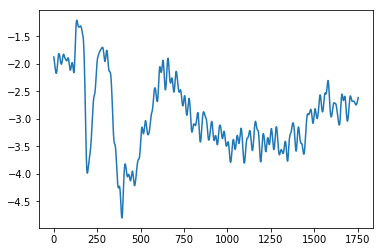

In [66]:
set = data[:,(tx>=0) & (tx<=1753)]
print(set.shape)
tax = tx[(tx>=0) & (tx<=1753)]
print(tax)
plt.plot(tax,np.mean(set,axis=0))

## Next:
* compute the FFT of the data on each trial
* then compute the amp on each trial
* then plot the average amplitude over a window from 12Hz to 35Hz

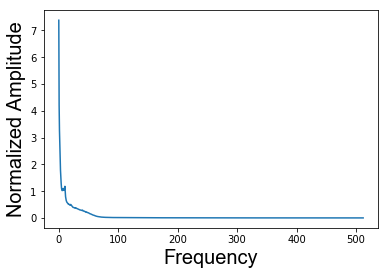

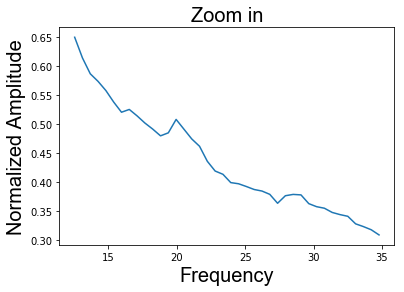

In [68]:
n = set.shape[1]
sp = np.fft.rfft(set, axis=1)
amp = (np.abs(sp)  / n ) * 2
aveamp = np.mean(amp, axis=0)

dt = 1/sr
freq = np.fft.rfftfreq(n, dt)

plt.plot(freq, aveamp)
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Normalized Amplitude', **fig_font)
plt.show()

sub = (freq>=12) & (freq<=35)
plt.plot(freq[sub], aveamp[sub])
plt.title('Zoom in', **fig_font)
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Normalized Amplitude', **fig_font)
plt.show()

## Not much going on...so now 
* average the data in the time domain (i.e. avg across all trials)
* then FFT, compute amp, then plot over the same window

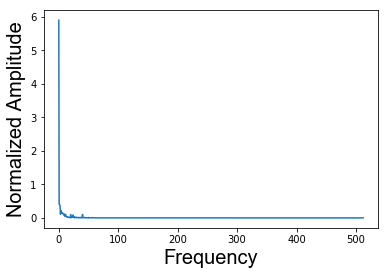

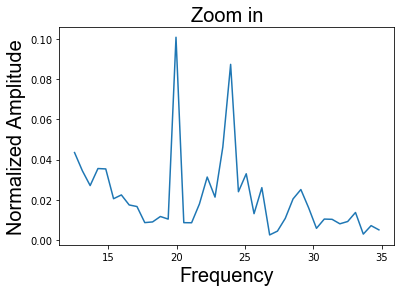

In [69]:
aved = np.mean(set, axis=0)

sp = np.fft.rfft(aved)
amp = (np.abs(sp)  / len(aved) ) * 2
dt = 1/sr
freq = np.fft.rfftfreq(aved.size, dt)

plt.plot(freq, amp)
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Normalized Amplitude', **fig_font)
plt.show()

sub = (freq>=12) & (freq<=35)
plt.plot(freq[sub], amp[sub])
plt.title('Zoom in', **fig_font)
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Normalized Amplitude', **fig_font)
plt.show()

## now what do you see? 
* what can infer about the experiment based on the difference in the amplitude spectrum from the two different methods (FFT all trials, then convert to amp, then average versus Average in time domain, then FFT and then compute amp)